<a href="https://colab.research.google.com/github/zhenglinchen1096496/DBU-Python/blob/main/AI_HW_7__Neural_Networks_Part_1_ZhengLinChen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###NOTE:
The NotebookGrader server will only allow 1 minute of compute for training.  As such, for Part 1, which is about learning the process, we are going to make a small model, train it for only a few epochs, and reduce the number of images in the training set.  For Part 2, you will make a larger model that you will train on the Google Colab servers for many epochs, and then you will save and load this trained model into a notebook for the grading of Part 2.

#Instructions

In this notebook, you will complete code only in cells below the comment `### YOUR SOLUTION HERE`.  You will add your relevant code in cells below the comment, and no where else.

For example, you would complete the code cell below as follows:
```
# Write code to print "Hello"
### YOUR SOLUTION HERE
print("Hello")
```

Once you have completed your code, you can test your code by running the test cell which contains a comment that looks like this:
```
# Tests 5 points: Printing "Hello"
```

**Do not change any parts of this notebook aside from adding code below the cells in the notebook with `### YOUR SOLUTION HERE`.**  Changing unauthorized parts of the notebook could result in a zero for the assignment.

In this notebook, proceed step by step.  Do not move on to the next section until you have successfully completed all of the prior sections.

You can see a video demo of this tool at the following link:

https://youtu.be/yvLWbpgnspM?si=oeUEICnxrC0Ysbjb&t=143

# Step 1

Run the cells below.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import random

# Set random seed for reproducibility
RANDOM_SEED = 23
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [ ]:
# Define a dictionary that maps target values to the corresponding MNIST Fashion clothing category names
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


In [ ]:
#  Show the shape of our downloaded data

print("TRAINNG DATA")
# Can see that in x data we have 60,000 28x28 pixel images
print(x_train.shape)
# Can see that we have one label for each of the 60,000 images
print(y_train.shape)
# print(x_train.shape[0])

print("\nTESTING DATA")
# Can see that in x data we have 10,000 28x28 pixel images
print(x_test.shape)
# Can see that we have one label for each of the 10,000 images
print(y_test.shape)

print('\n Testing to Training ratio =', x_test.shape[0]/x_train.shape[0])


TRAINNG DATA
(60000, 28, 28)
(60000,)

TESTING DATA
(10000, 28, 28)
(10000,)

 Testing to Training ratio = 0.16666666666666666


In [ ]:
# DELETE THIS CELL IN PART 2
# Reduce the number of data samples so that the NotebookGrader server can perform the training

# Calculate the new number of samples
new_train_size = int(x_train.shape[0] / 120)
new_test_size = int(x_test.shape[0] / 120)

# Randomly sample the data
train_indices = np.random.choice(x_train.shape[0], size=new_train_size, replace=False)
test_indices = np.random.choice(x_test.shape[0], size=new_test_size, replace=False)

x_train = x_train[train_indices]
y_train = y_train[train_indices]
x_test = x_test[test_indices]
y_test = y_test[test_indices]

print("\nREDUCED TRAINING DATA")
print(x_train.shape)
print(y_train.shape)

print("\nREDUCED TESTING DATA")
print(x_test.shape)
print(y_test.shape)



REDUCED TRAINING DATA
(500, 28, 28)
(500,)

REDUCED TESTING DATA
(83, 28, 28)
(83,)


In [ ]:
# You can see each element in X data is 28x28 array where each value is the grayscale value of the pixel from 0-255 where black(255)/white(0)

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 163, 177,  94,
         64,  44,  79, 162, 145,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 143, 231, 253, 225, 225, 254,
        227, 236, 255, 229, 224, 253, 221, 136,  11,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  92, 234, 230, 219, 213, 209, 211, 214,
        213, 218, 213, 209, 208, 209, 218, 231, 220,  72,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  23, 228, 215, 209, 213, 215, 210, 213, 210,
        207, 207, 203, 208, 209, 209, 210, 204, 210, 223,  35,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 169, 234, 213, 216, 215, 213, 213, 212, 210,
        211, 209, 209, 209, 209, 208, 207, 213, 205, 220, 194,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 239, 226, 222, 216, 214, 214, 213, 212, 211,
        210, 209, 208, 208, 208, 209, 209, 207, 209, 210, 246,   0,   0,
          0,   0],
       [  0,   0,   0,  39, 231, 221, 228, 218, 215, 215, 214, 213, 212,
        210, 209, 208, 208, 209, 208, 207, 205, 210, 212, 245,  44,   0,
          0,   0],
       [  0,   0,   0,  82, 232, 222, 231, 217, 215, 216, 214, 214, 214,
        210, 208, 208, 207, 208, 208, 202, 205, 221, 211, 221,  83,   0,
          0,   0],
       [  0,   0,   0, 167, 242, 222, 234, 235, 211, 219, 215, 212, 210,
        212, 211, 211, 209, 213, 212, 199, 227, 224, 211, 224, 173,   0,
          0,   0],
       [  0,   0,   0, 122, 188, 231, 252, 231, 222, 220, 219, 214, 211,
        212, 210, 210, 207, 207, 216, 200, 230, 249, 222, 192, 129,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 100,  30, 243, 216, 223, 215, 211,
        213, 212, 210, 211, 208, 207, 234,  44, 106,  41,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 246, 219, 221, 214, 209,
        212, 211, 210, 211, 211, 205, 247,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   0,   0, 236, 222, 216, 216, 209,
        211, 211, 209, 210, 212, 205, 243,   8,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 240, 221, 216, 217, 209,
        211, 211, 210, 210, 211, 205, 203,   9,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0, 205, 219, 216, 217, 208,
        211, 211, 210, 209, 211, 207, 203,   5,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0, 210, 216, 218, 215, 209,
        211, 211, 210, 210, 212, 209, 201,   6,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0, 210, 215, 219, 213, 210,
        212, 211, 211, 212, 207, 213, 203,   6,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0, 200, 216, 216, 214, 210,
        211, 211, 211, 212, 206, 213, 205,   0,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0, 201, 216, 213, 215, 209,
        210, 211, 211, 212, 210, 209, 208,   1,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0, 208, 216, 214, 215, 210,
        211, 211, 211, 210, 212, 208, 214,  10,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  12, 213, 210, 217, 214, 211,
        212, 211, 211, 211, 213, 206, 215,  35,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,  56, 220, 207, 218, 214, 210,
        211, 211, 211, 211, 215, 207, 217,  78,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0, 109, 224, 209, 218, 214, 211,
        211, 211, 211, 210, 213, 210, 219, 110,   0,   1,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0, 130, 226, 209, 215, 213, 212,
        212, 212, 212, 213, 210, 211, 219, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   

# Step 2

## Step 2a - Your code

In the cell below, normalize the X feature data to have values between 0 and 1 inclusive.  

Save your normalized data as `x_train` and `x_test` (in other words, don't change the variable names).

In [ ]:
# Normalize the x data to [0, 1]
# Save your normalized data as x_train and x_test

### YOUR SOLUTION HERE
x_train = x_train / 255.0
x_test = x_test / 255.0
# x_train[10]


In [ ]:
# Non-graded feedback on your code
# print(x_train[10][12][15])
# print(y_train[10])
# print(fashion_mnist_labels[y_train[10]])
if x_train.shape != (500, 28, 28): print("The shape of x_train is incorrect.")
if y_train.shape != (500,): print("The shape of y_train is incorrect.")
if x_train[10][12][15] != 0.8588235294117647: print("x_train[10][12][15] has incorrect value.")
if y_train[10] != 1: print("y_train[10] has incorrect value.")
if fashion_mnist_labels[y_train[10]] != "Trouser": print("fashion_mnist_labels[y_train[10]] has incorrect value.")

## Step 2b - Instructor grading code in the cell below

In [ ]:
# Tests 5 points: Testing the data loading and normalization
print ("Beginning hidden tests...")
print("Hidden tests complete.")

Beginning hidden tests...
Hidden tests complete.


# Step 3

## Step 3a - Your code

Split the training data into training and validation sets using `train_test_split` such that the validation data is equal in size to the test data.

The data sets should be called:
* Training data: `x_train` and `y_train`
* Validation data: `x_val` and `y_val`
* Testing data: `x_test` and `y_test`

IMPORTANT: For the purpose of reproducibility and grading, in `train_test_split` you must pass the argument `random_state = RANDOM_SEED`.

In [ ]:
# Split the training data according to the instructions above
# Make sure to pass random_state=RANDOM_SEED as an argument in train_test_split

### YOUR SOLUTION HERE

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1666666, random_state=RANDOM_SEED)


In [ ]:
# Non-graded feedback on your code
# print(x_train.shape)
# print(y_train.shape)
# print(x_train[7][10][15])
# print(y_train[7])
if x_train.shape != (416, 28, 28): print("The shape of x_train is incorrect.")
if y_train.shape != (416,): print("The shape of y_train is incorrect.")
if x_train[7][10][15] != 0.9686274509803922: print("x_train[7][10][15] has incorrect value.")
if y_train[7] != 1: print("y_train[7] has incorrect value.")

## Step 3b - Instructor grading code in the cell below

In [ ]:
# Tests 5 points: Testing the data splitting
print ("Beginning hidden tests...")
print("Hidden tests complete.")

Beginning hidden tests...
Hidden tests complete.


## Step 3c
Run the code below to see the data splitting proportions and class counts for each data set.

In [ ]:
# Run this cell to see train/val/test split by proportion

total_data_size = x_train.shape[0] + x_val.shape[0] + x_test.shape[0]
print("Training data proportion:", x_train.shape[0]/total_data_size)
print("Validation data proportion:", x_val.shape[0]/total_data_size)
print("Testing data proportion:", x_test.shape[0]/total_data_size)

Training data proportion: 0.7135506003430532
Validation data proportion: 0.14408233276157806
Testing data proportion: 0.1423670668953688


In [ ]:
# Count the number of occurrences of each class in y_train and y_test
train_class_counts = np.bincount(y_train)
val_class_counts = np.bincount(y_val)
test_class_counts = np.bincount(y_test)

# Print the counts for the training data
print("Class counts in the training data:")
for i in range(len(train_class_counts)):
    print(f"Class {i}: {train_class_counts[i]} samples")

# Print the counts for the validation data
print("\nClass counts in the validation data:")
for i in range(len(val_class_counts)):
    print(f"Class {i}: {val_class_counts[i]} samples")

# Print the counts for the test data
print("\nClass counts in the test data:")
for i in range(len(test_class_counts)):
    print(f"Class {i}: {test_class_counts[i]} samples")

Class counts in the training data:
Class 0: 54 samples
Class 1: 36 samples
Class 2: 46 samples
Class 3: 30 samples
Class 4: 44 samples
Class 5: 48 samples
Class 6: 42 samples
Class 7: 38 samples
Class 8: 37 samples
Class 9: 41 samples

Class counts in the validation data:
Class 0: 8 samples
Class 1: 8 samples
Class 2: 7 samples
Class 3: 6 samples
Class 4: 11 samples
Class 5: 10 samples
Class 6: 6 samples
Class 7: 10 samples
Class 8: 8 samples
Class 9: 10 samples

Class counts in the test data:
Class 0: 9 samples
Class 1: 8 samples
Class 2: 8 samples
Class 3: 12 samples
Class 4: 6 samples
Class 5: 6 samples
Class 6: 10 samples
Class 7: 12 samples
Class 8: 8 samples
Class 9: 4 samples


# Step 4

## Step 4a - Your code

Build and compile a sequential neural network model with the following:
1. Define the input shape
2. A layer that flattens the data
3. A dense layer with 32 nodes that uses RELU activation
4. A dropout layer that only uses 60% of the nodes each pass
5. A dense layer with 16 nodes that uses RELU activation
6. A dropout layer that only uses 70% of the nodes each pass
7. A dense output layer that uses Softmax activation to classify among the 10 classes

Save your model the provided variable called `model`.

In [ ]:
# Build your model according to the instructions above using keras

#  The variable name of your NN model should be model
model = None

### YOUR SOLUTION HERE
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])
### YOUR SOLUTON ABOVE HERE

# For reproducibility for grading, save initial weights
initial_weights = model.get_weights()
# total number of parameters in model
total_params = model.count_params()
# total number of trainable parameters in model
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
# See a summary of your model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Non-graded feedback on your code
if trainable_params != 25818: print("The number of trainable parameters in the model is incorrect.")
if type(model.layers[0]) != keras.layers.Flatten: print("The first layer of the model should be a flatten layer.")
if type(model.layers[1]) != keras.layers.Dense: print("The second layer of the model should be a dense layer.")
if model.input_shape != (None, 28, 28): print("The input shape of the model is incorrect.")
if model.output_shape != (None, 10): print("The output shape of the model is incorrect.")
if model.layers[1].units != 32: print("The number of nodes in the first hidden layer is incorrect.")
if model.layers[2].rate != 0.4: print("The dropout rate in the first dropout layer is incorrect.")
if model.layers[1].activation.__name__ != 'relu': print("The activation function in the first hidden layer is incorrect.")

The number of trainable parameters in the model is incorrect.
The number of nodes in the first hidden layer is incorrect.
The dropout rate in the first dropout layer is incorrect.


## Step 4b - Instructor grading code in the cell below

In [ ]:
# Tests 15 points: Testing the model build
print ("Beginning hidden tests...")
print("Hidden tests complete.")

Beginning hidden tests...
Hidden tests complete.


## Step 4c - Your code

Compile your model according to the following:
* Use the ADAM optimizer
* Use sparse categorical crossentropy as your loss function
* Use sparse categorical accuracy as your evaluation metric

In [ ]:
# Compile your model according to the instructions above

### YOUR SOLUTION HERE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [ ]:
# Non-graded feedback on your code
if model.loss != 'sparse_categorical_crossentropy': print("The loss function is incorrect.")

## Step 4d - Instructor grading code in the cell below

In [ ]:
# Tests 10 points: Testing the compiled neural net
print ("Beginning hidden tests...")
print("Hidden tests complete.")

Beginning hidden tests...
Hidden tests complete.


# Step 5

## Step 5a - Your code

Train the neural network `model` such that
*  Save the training history in a variable called `history`
*  For validation data, use `x_val` and `y_val`
*  Train the number of epochs defined in the constant `EPOCHS`
*  Use a batch size of 32

Important: Make sure you only train for `epochs = EPOCHS` in order to reduce compute demand on the grading server.

In [ ]:
# Train your model according to the instructions above

# Before calling model.fit(), reset the weights so that use same starting point every time
model.set_weights(initial_weights)

# So we don't overload server with compute requests
EPOCHS = 20

### YOUR SOLUTION HERE
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3801 - sparse_categorical_accuracy: 0.0896 - val_loss: 2.0565 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0626 - sparse_categorical_accuracy: 0.2515 - val_loss: 1.7525 - val_sparse_categorical_accuracy: 0.5476
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7555 - sparse_categorical_accuracy: 0.3985 - val_loss: 1.4358 - val_sparse_categorical_accuracy: 0.6071
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5550 - sparse_categorical_accuracy: 0.4920 - val_loss: 1.1666 - val_sparse_categorical_accuracy: 0.6548
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3056 - sparse_categorical_accuracy: 0.5189 - val_loss: 1.1094 - val_sparse_categorical_accuracy: 0.6429
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1495 - sparse_categorical_accuracy: 0.5683 - val_loss: 0.9561 - val_sparse_categorical_accuracy: 0.7143
Epoch 7/20


In [ ]:
# Non-graded feedback on your code
if history.params['epochs'] != EPOCHS: print("The number of epochs is incorrect.")

## Step 5b - Instructor grading code in the cell below

In [ ]:
# Tests 5 points: Testing model training
print ("Beginning hidden tests...")
print("Hidden tests complete.")

Beginning hidden tests...
Hidden tests complete.


## Step 5c
Run the cell below and examine the training plots.

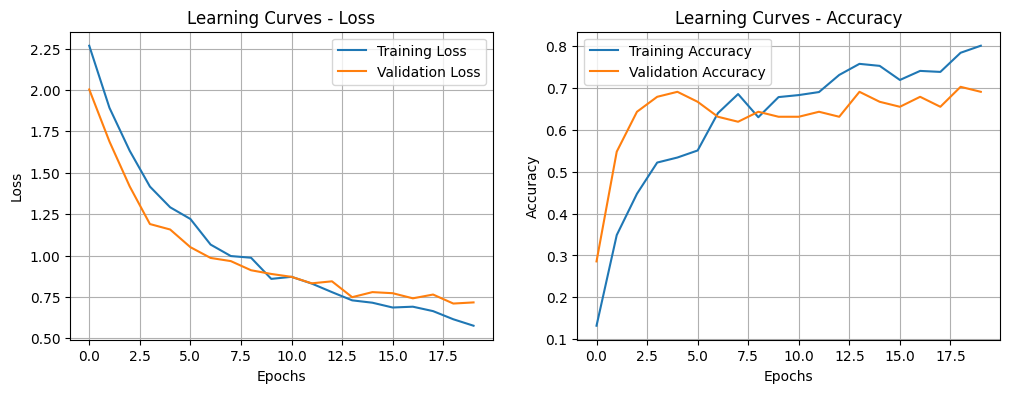

In [ ]:
# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# Step 6

## Step 6a - Your code
Model evaluation

To perform the model evaluation, do the following:
1. Have the model make predictions using the test data.
2. Evaluate the predictions using sparse categorical accuracy.
Save the value of sparse categorical accuracy to the variable
`sca_metric`.
3. Convert the predictions (each prediction is a vector of the probability for each class option) to class labels (each prediction is an integer representing the predicted class).
4. Evaluate the class label predictions using a weighted F1 score.
Save the value of the weighted F1-score to the variable
`f1_metric`.
5. Print the values of `sca_metric` and `f1_metric`.

In [ ]:
# Perform the instructions above

### YOUR SOLUTION HERE
sca_metric = model.evaluate(x_test, y_test)[1]
y_pred = np.argmax(model.predict(x_test), axis=1)
f1_metric = f1_score(y_test, y_pred, average='weighted')
print("Sparse Categorical Accuracy:", sca_metric)
print("Weighted F1-score:", f1_metric)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7063 - sparse_categorical_accuracy: 0.7404


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sparse Categorical Accuracy: 0.7228915691375732
Weighted F1-score: 0.7098999084639858


In [ ]:
# Non-graded feedback on your code
if y_pred[5] != 5: print("y_pred[5] has incorrect value.")

y_pred[5] has incorrect value.


## Step 6b - Instructor grading code in the cell below

In [ ]:
# Tests 10 points: Testing model predictions and evaluation metrics
print ("Beginning hidden tests...")
print("Hidden tests complete.")

Beginning hidden tests...
Hidden tests complete.
